# Car Price - Linear Regression Assignment

### Importing Libraries

In [277]:
import warnings
warnings.filterwarnings('ignore')

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Problem Statement, Business Analysis, Data Understanding, EDA

### Problem Statement & Business Objectives

#### Problem Context

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

#### Business Goals

- Create a linear model between CarPrice and Driver Variables 
- Evaluate how well this linear model helps Geely Auto in pricing their cars competitively in US market

Thus, model interpretation is key aspect!


In [279]:
# loading data

df = pd.read_csv("CarPrice_Assignment.csv")

In [280]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

 - dataset has 25 independent features and one independent feature - Price
 - shape = 205x26

In [282]:
## separating CarName into car company and car model
## seems like car company name and car model is separated after first space

new = df['CarName'].str.split(" ",n=1,expand = True)

In [283]:
df['car company'] = new[0]
df['car model'] = new[1]

In [284]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car company,car model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


#### let's start with converting categorical features into numerical

In [285]:
## using LabelEncoder for treating categorical variables
le = LabelEncoder()

In [286]:
print(df['fueltype'].value_counts())
le.fit(df.fueltype.drop_duplicates()) 
df.fueltype = le.transform(df.fueltype)

gas       185
diesel     20
Name: fueltype, dtype: int64


In [287]:
print(df['aspiration'].value_counts())
le.fit(df.aspiration.drop_duplicates()) 
df.aspiration = le.transform(df.aspiration)

std      168
turbo     37
Name: aspiration, dtype: int64


In [288]:
print(df['doornumber'].value_counts())
le.fit(df.doornumber.drop_duplicates()) 
df.doornumber = le.transform(df.doornumber)

four    115
two      90
Name: doornumber, dtype: int64


In [289]:
print(df['carbody'].value_counts())
le.fit(df.carbody.drop_duplicates()) 
df.carbody = le.transform(df.carbody)

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


In [290]:
print(df['drivewheel'].value_counts())
le.fit(df.drivewheel.drop_duplicates()) 
df.drivewheel = le.transform(df.drivewheel)

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


In [291]:
print(df['enginelocation'].value_counts())
le.fit(df.enginelocation.drop_duplicates()) 
df.enginelocation = le.transform(df.enginelocation)

front    202
rear       3
Name: enginelocation, dtype: int64


In [292]:
print(df['enginetype'].value_counts())
le.fit(df.enginetype.drop_duplicates()) 
df.enginetype = le.transform(df.enginetype)

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


In [293]:
print(df['cylindernumber'].value_counts())
le.fit(df.cylindernumber.drop_duplicates()) 
df.cylindernumber = le.transform(df.cylindernumber)

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64


In [294]:
print(df['fuelsystem'].value_counts())
le.fit(df.fuelsystem.drop_duplicates()) 
df.fuelsystem = le.transform(df.fuelsystem)

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64


In [295]:
print(df['car company'].value_counts())
le.fit(df['car company'].drop_duplicates()) 
df['car company'] = le.transform(df['car company'])

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
maxda           2
vw              2
toyouta         1
porcshce        1
vokswagen       1
mercury         1
Nissan          1
Name: car company, dtype: int64


In [296]:
print(df.shape)
df.head()

(205, 28)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car company,car model
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1,giulia
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1,stelvio
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1,Quadrifoglio
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,2,100 ls
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,2,100ls


Now that we have converted all categorical variables into numberical, let's drop a few variables which are not of use


In [297]:
# dropping redundant variables car id, car model, carName
df = df.drop(['car_ID', 'CarName', 'car model'], axis=1)

In [298]:
print(df.shape)
df.head()

(205, 25)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car company
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2


##### Let's plot a few plots to see if linear relationship exists between Price and other features

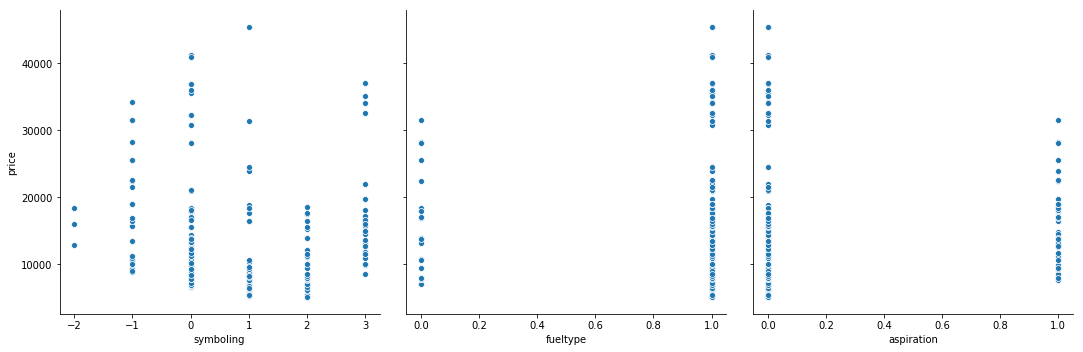

In [299]:
#sns.pairplot(df)
#plt.show()

sns.pairplot(df, x_vars=['symboling', 'fueltype', 'aspiration'], y_vars='price',height=5, aspect=1, kind='scatter')
plt.show()

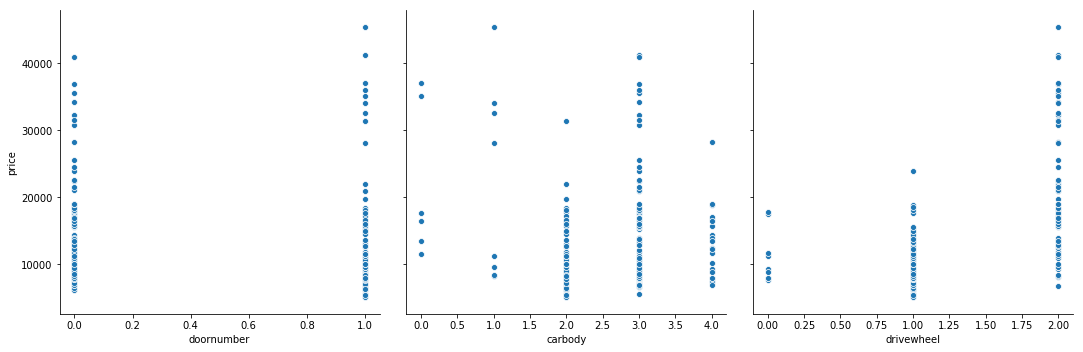

In [300]:
sns.pairplot(df, x_vars=['doornumber', 'carbody', 'drivewheel'], y_vars='price',height=5, aspect=1, kind='scatter')
plt.show()

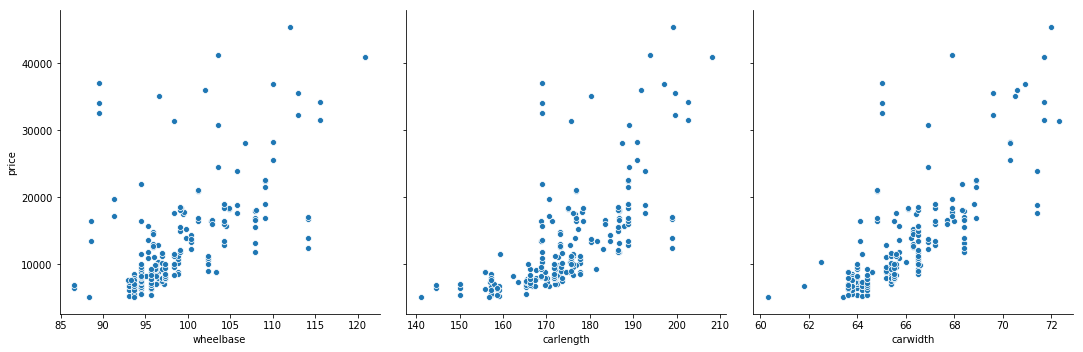

In [301]:
sns.pairplot(df, x_vars=['wheelbase', 'carlength', 'carwidth'], y_vars='price',height=5, aspect=1, kind='scatter')
plt.show()

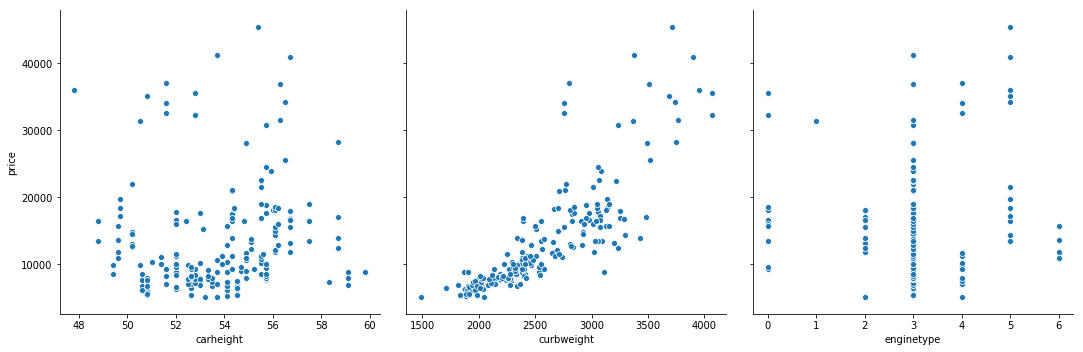

In [302]:
sns.pairplot(df, x_vars=['carheight', 'curbweight', 'enginetype'], y_vars='price',height=5, aspect=1, kind='scatter')
plt.show()

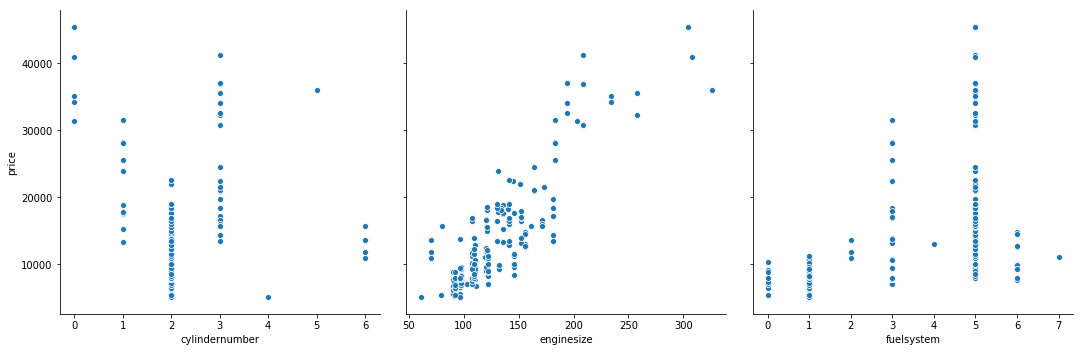

In [303]:
sns.pairplot(df, x_vars=['cylindernumber', 'enginesize', 'fuelsystem'], y_vars='price',height=5, aspect=1, kind='scatter')
plt.show()

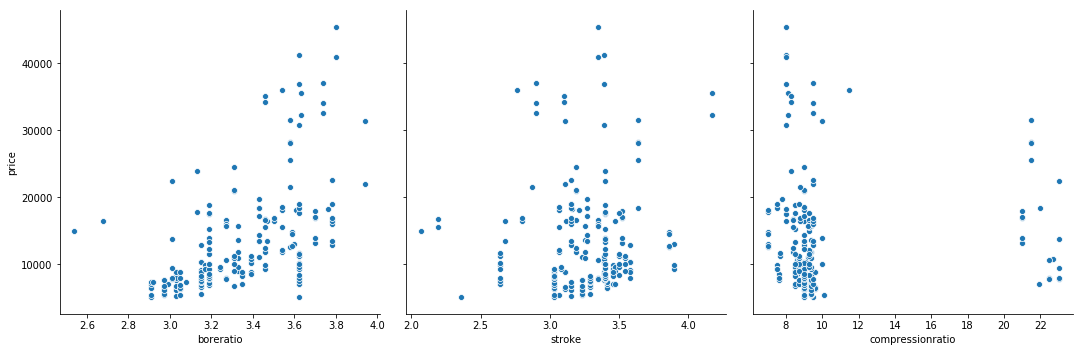

In [304]:
sns.pairplot(df, x_vars=['boreratio', 'stroke', 'compressionratio'], y_vars='price',height=5, aspect=1, kind='scatter')
plt.show()

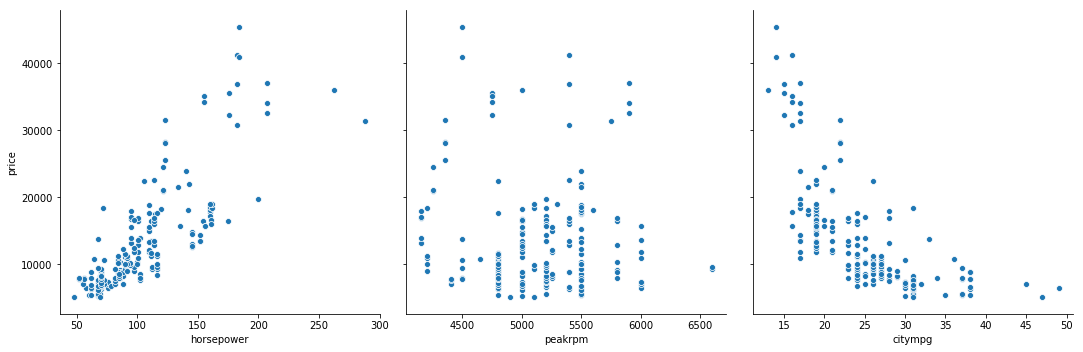

In [305]:
sns.pairplot(df, x_vars=['horsepower', 'peakrpm', 'citympg'], y_vars='price',height=5, aspect=1, kind='scatter')
plt.show()

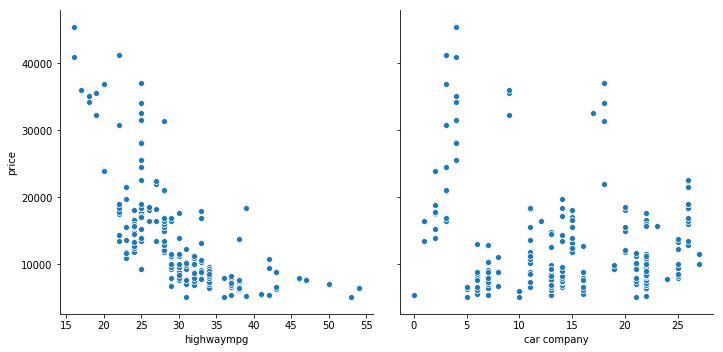

In [306]:
sns.pairplot(df, x_vars=['highwaympg', 'car company'], y_vars='price',height=5, aspect=1, kind='scatter')
plt.show()

##### Note
- clearly with few features we can see that a linear relationship exists with Price like with horsepower, enginesize
- while some features are not looking linearly related to Price

#### Visualizing Categorical variables

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null int32
aspiration          205 non-null int32
doornumber          205 non-null int32
carbody             205 non-null int32
drivewheel          205 non-null int32
enginelocation      205 non-null int32
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null int32
cylindernumber      205 non-null int32
enginesize          205 non-null int64
fuelsystem          205 non-null int32
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205

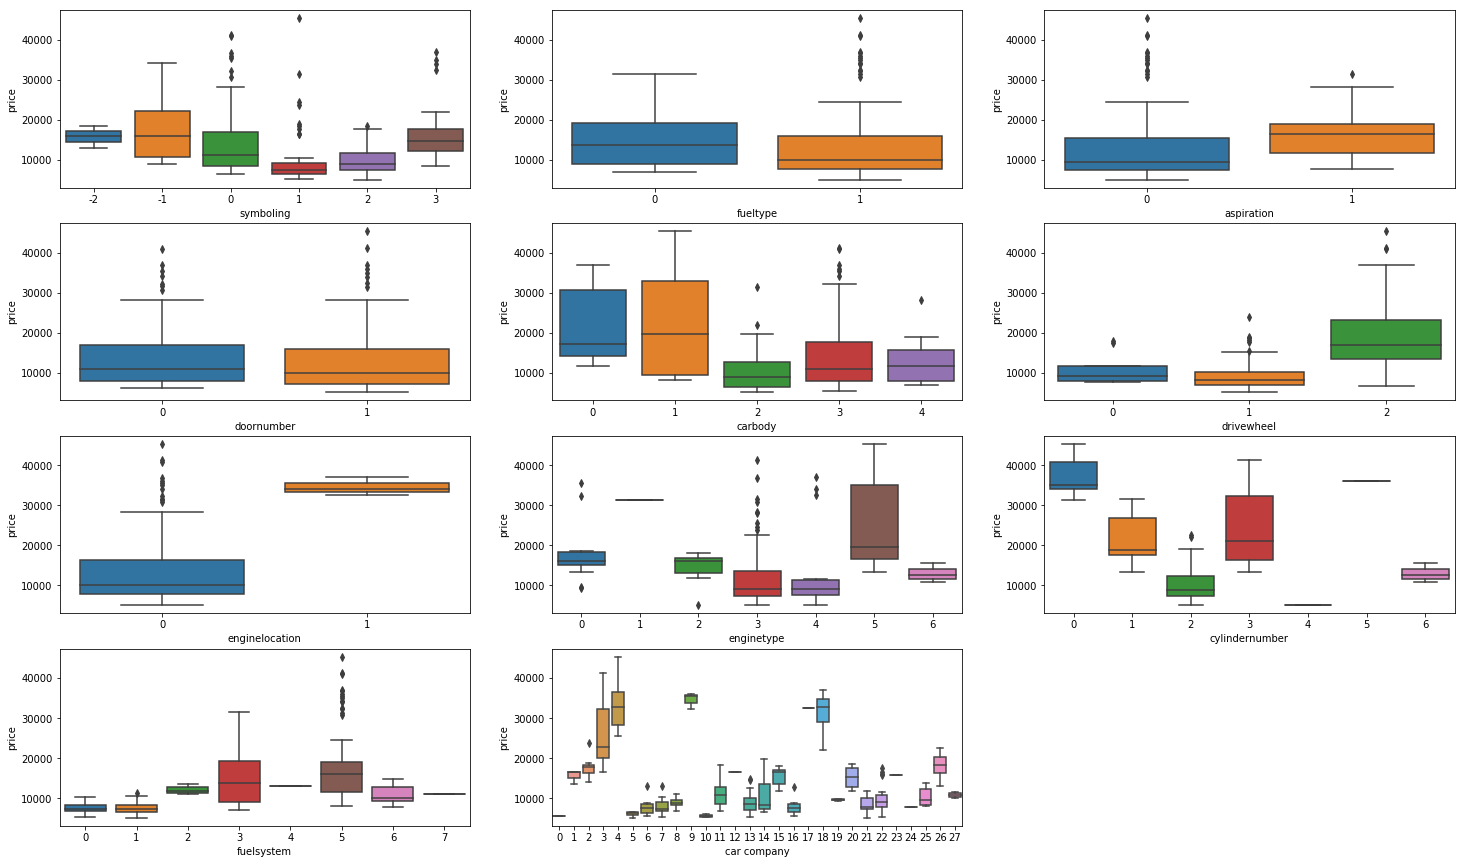

In [308]:
plt.figure(figsize=(25, 15))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = df)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.subplot(4,3,11)
sns.boxplot(x = 'car company', y = 'price', data = df)

plt.show()

### Dividing the data into Train and Test 

In [309]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [310]:
print(df_train.shape)
print(df_test.shape)

(143, 25)
(62, 25)


In [311]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car company
122,1,1,0,0,3,1,0,93.7,167.3,63.8,...,1,2.97,3.23,9.4,68,5500,31,38,7609.0,16
125,3,1,0,1,2,2,0,94.5,168.9,68.3,...,5,3.94,3.11,9.5,143,5500,19,27,22018.0,18
166,1,1,0,1,2,2,0,94.5,168.7,64.0,...,5,3.24,3.08,9.4,112,6600,26,29,9538.0,22
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
199,-1,1,1,0,4,2,0,104.3,188.8,67.2,...,5,3.62,3.15,7.5,162,5100,17,22,18950.0,26


In [312]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car company
160,0,1,0,0,3,1,0,95.7,166.3,64.4,...,1,3.19,3.03,9.0,70,4800,38,47,7738.0,22
186,2,1,0,0,3,1,0,97.3,171.7,65.5,...,5,3.19,3.40,9.0,85,5250,27,34,8495.0,25
59,1,1,0,1,2,1,0,98.8,177.8,66.5,...,1,3.39,3.39,8.6,84,4800,26,32,8845.0,11
165,1,1,0,1,3,2,0,94.5,168.7,64.0,...,5,3.24,3.08,9.4,112,6600,26,29,9298.0,22
140,2,1,0,1,2,0,0,93.3,157.3,63.8,...,1,3.62,2.64,8.7,73,4400,26,31,7603.0,21


#### Rescaling features using Min-Max Normalization method

In [313]:
scaler = MinMaxScaler()

In [314]:
# Applying scaling on only numerical features
vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
       'horsepower','peakrpm','citympg','highwaympg', 'price']
#fitting scaler object onto train set 
df_train[vars] = scaler.fit_transform(df_train[vars])

In [315]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car company
122,1,1,0,0,3,1,0,0.244828,0.426016,0.291667,...,1,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,16
125,3,1,0,1,2,2,0,0.272414,0.452033,0.666667,...,5,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,18
166,1,1,0,1,2,2,0,0.272414,0.448780,0.308333,...,5,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,22
1,3,1,0,1,0,2,0,0.068966,0.450407,0.316667,...,5,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,1
199,-1,1,1,0,4,2,0,0.610345,0.775610,0.575000,...,5,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,26


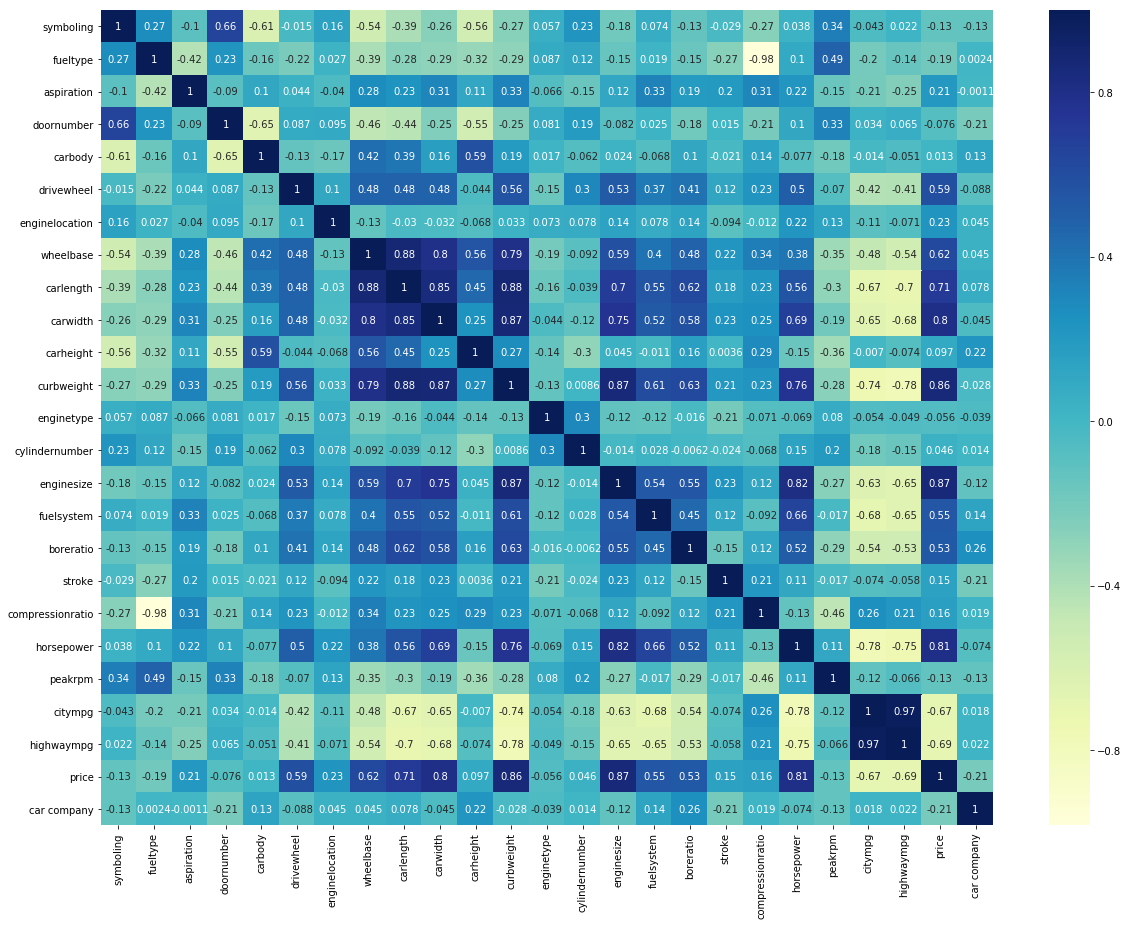

In [316]:
# let's see  the correlation amongst features using a heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Note
- from above plot we can say that drivewheel, wheelbase, carlength, carwidth, curbweight, enginesize, fuelsystem,boreration, horsepower, citympg(neg), highwaympg(neg) have strong correlation with Price

### Model Building, Model Pruning using RFE, VFI

#### Dividing df_train into X and y

In [317]:
y_train = df_train.pop('price')
X_train = df_train

In [318]:
# let's take feature ranking using RFE for top 15 features to startwith

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [319]:
# displaying the rfe fitted top 15 features, their ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 10),
 ('fueltype', True, 1),
 ('aspiration', False, 7),
 ('doornumber', False, 5),
 ('carbody', False, 3),
 ('drivewheel', True, 1),
 ('enginelocation', True, 1),
 ('wheelbase', False, 4),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginetype', False, 9),
 ('cylindernumber', False, 2),
 ('enginesize', True, 1),
 ('fuelsystem', False, 6),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('car company', False, 8)]

In [320]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['fueltype', 'drivewheel', 'enginelocation', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [321]:
X_train.columns[~rfe.support_]

Index(['symboling', 'aspiration', 'doornumber', 'carbody', 'wheelbase',
       'enginetype', 'cylindernumber', 'fuelsystem', 'car company'],
      dtype='object')

#### Note
- Now that we have a feature ranking with top 15 ranked features, let's create a linear model for these features first

##### we will be using statsmodel.api from hereon as our busienss objective , auto company is interested to know the driver features for Price in US and not just a precise linear model for price prediction

In [322]:
X_train_rfe = X_train[rfe_col]

In [323]:
# as we know with statsmodel we need to add the constant term
X_train_rfe = sm.add_constant(X_train_rfe)

In [324]:
# let's fit the linear model on rfe featrues
lr = sm.OLS(y_train,X_train_rfe).fit()

In [325]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     54.04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.17e-47
Time:                        18:41:04   Log-Likelihood:                 159.89
No. Observations:                 143   AIC:                            -287.8
Df Residuals:                     127   BIC:                            -240.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0524      0.220  

#### Note
- our first model isn't that bad, adjusted R2 ~ 85%, 
- from Prob(F-stat) we can say that overall model is significant
- But out of 15 features , p-value tells some are not significant 

In [326]:
# let's see VFI for these 15 variables
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,985.06
1,fueltype,56.73
11,compressionratio,53.85
14,citympg,28.89
15,highwaympg,27.03
7,curbweight,19.57
8,enginesize,9.32
4,carlength,8.70
12,horsepower,8.46
5,carwidth,5.78


- clearly some features have very high vif that may be due to multi-colllinearity with other features
- we will now remove features one by one as we don't have many features based on p-value significance and then see how vif values change

In [327]:
# dropping highwaympg as it has highest p-value

X_train_1 = X_train_rfe.drop(['highwaympg'], axis=1)

In [328]:
lr1 = sm.OLS(y_train,X_train_1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     58.22
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.71e-48
Time:                        18:41:11   Log-Likelihood:                 159.75
No. Observations:                 143   AIC:                            -289.5
Df Residuals:                     128   BIC:                            -245.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0416      0.219  

In [329]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,975.83
1,fueltype,55.36
11,compressionratio,52.46
7,curbweight,18.51
8,enginesize,9.12
4,carlength,8.63
12,horsepower,7.91
14,citympg,6.20
5,carwidth,5.76
13,peakrpm,2.40


- citympg vif reduced drastically , as it's corr coeff with highwaympg was 0.97 

In [330]:
# dropping citympg now
X_train_2 = X_train_1.drop(['citympg'], axis=1)

In [331]:
lr2= sm.OLS(y_train,X_train_2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     63.07
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.33e-49
Time:                        18:41:14   Log-Likelihood:                 159.63
No. Observations:                 143   AIC:                            -291.3
Df Residuals:                     129   BIC:                            -249.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0285      0.216  

In [332]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,959.49
1,fueltype,54.06
11,compressionratio,48.83
7,curbweight,15.93
8,enginesize,8.34
4,carlength,7.88
12,horsepower,7.37
5,carwidth,5.73
13,peakrpm,2.35
9,boreratio,2.32


#### Note
 let's now remove all features which have p>0.05 and vif >5 as clearly these are definitely insignificant in explaining linear relationship with Price

In [333]:
# removing fueltype , and compressionratio from previous model
X_train_3 = X_train_2.drop(['fueltype', 'compressionratio'], axis=1)

In [334]:
lr3= sm.OLS(y_train,X_train_3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     74.84
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.81e-51
Time:                        18:41:16   Log-Likelihood:                 158.93
No. Observations:                 143   AIC:                            -293.9
Df Residuals:                     131   BIC:                            -258.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1637      0.048     -3.

In [335]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.44
6,curbweight,12.84
3,carlength,7.32
7,enginesize,7.00
10,horsepower,6.66
4,carwidth,5.27
8,boreratio,2.25
5,carheight,2.10
11,peakrpm,2.01
1,drivewheel,1.60


In [336]:
# removing carlength, carheight now
X_train_4 = X_train_3.drop(['carlength', 'carheight'], axis=1)

In [337]:
lr4= sm.OLS(y_train,X_train_4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     91.37
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.58e-52
Time:                        18:41:18   Log-Likelihood:                 157.92
No. Observations:                 143   AIC:                            -295.8
Df Residuals:                     133   BIC:                            -266.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1581      0.043     -3.

In [338]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,37.60
4,curbweight,8.35
5,enginesize,6.81
8,horsepower,5.62
3,carwidth,4.59
6,boreratio,2.14
9,peakrpm,1.98
1,drivewheel,1.52
7,stroke,1.30
2,enginelocation,1.18


In [339]:
# removing horsepower now
X_train_5 = X_train_4.drop(['horsepower'], axis=1)

In [340]:
lr5= sm.OLS(y_train,X_train_5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     102.4
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.81e-53
Time:                        18:41:19   Log-Likelihood:                 157.25
No. Observations:                 143   AIC:                            -296.5
Df Residuals:                     134   BIC:                            -269.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1748      0.040     -4.

In [341]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.08
4,curbweight,8.07
3,carwidth,4.59
5,enginesize,4.33
6,boreratio,2.09
1,drivewheel,1.52
7,stroke,1.27
8,peakrpm,1.21
2,enginelocation,1.16


In [342]:
# removing boreratio now
X_train_6 = X_train_5.drop(['boreratio'], axis=1)

In [343]:
lr6= sm.OLS(y_train,X_train_6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     114.4
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.42e-53
Time:                        18:41:21   Log-Likelihood:                 155.39
No. Observations:                 143   AIC:                            -294.8
Df Residuals:                     135   BIC:                            -271.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2150      0.034     -6.

In [344]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.62
4,curbweight,7.81
3,carwidth,4.43
5,enginesize,4.33
1,drivewheel,1.50
7,peakrpm,1.16
2,enginelocation,1.13
6,stroke,1.09


In [345]:
# removing stroke now
X_train_7 = X_train_6.drop(['stroke'], axis=1)

In [346]:
lr7= sm.OLS(y_train,X_train_7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     131.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.77e-54
Time:                        18:41:23   Log-Likelihood:                 154.16
No. Observations:                 143   AIC:                            -294.3
Df Residuals:                     136   BIC:                            -273.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2456      0.028     -8.

In [347]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.51
4,curbweight,7.79
3,carwidth,4.40
5,enginesize,4.26
1,drivewheel,1.50
6,peakrpm,1.15
2,enginelocation,1.11


- now that p-value of all remaining features in model is less than 0.05, let's remove feature with vif>5

In [348]:
# removing curbweight now
X_train_8 = X_train_7.drop(['curbweight'], axis=1)

In [349]:
lr8= sm.OLS(y_train,X_train_8).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.01e-53
Time:                        18:41:26   Log-Likelihood:                 149.69
No. Observations:                 143   AIC:                            -287.4
Df Residuals:                     137   BIC:                            -269.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2491      0.029     -8.

In [350]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.48
4,enginesize,2.84
3,carwidth,2.50
1,drivewheel,1.43
5,peakrpm,1.12
2,enginelocation,1.11


In [351]:
# removing peakrpm now
X_train_9 = X_train_8.drop(['peakrpm'], axis=1)

In [352]:
lr9= sm.OLS(y_train,X_train_9).fit()
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           9.26e-54
Time:                        18:41:28   Log-Likelihood:                 147.71
No. Observations:                 143   AIC:                            -285.4
Df Residuals:                     138   BIC:                            -270.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2149      0.023     -9.

In [353]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.71
4,enginesize,2.68
3,carwidth,2.49
1,drivewheel,1.42
2,enginelocation,1.07


#### Note
now we have a linear model which is completely pruned based on p-value significance and vif significance

### Residual Analysis and Model Evaluation

In [354]:
y_train_pred = lr9.predict(X_train_9)

Text(0.5, 0, 'Errors')

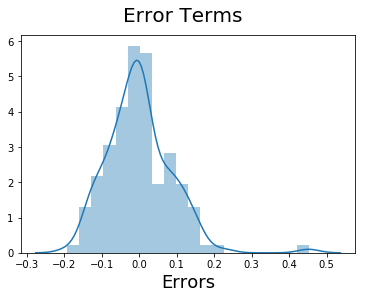

In [355]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)  

- pretty much normal distribution
- centred around mean=0

overall assumptions of linear regression fit well with our final model

#### Let's predict on test dataset after scaling it and then evaluate the model

In [356]:
vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
       'horsepower','peakrpm','citympg','highwaympg', 'price']
#fitting scaler object onto test set 
df_test[vars] = scaler.transform(df_test[vars])

In [357]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car company
160,0,1,0,0,3,1,0,0.313793,0.409756,0.341667,...,1,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382,22
186,2,1,0,0,3,1,0,0.368966,0.497561,0.433333,...,5,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295,25
59,1,1,0,1,2,1,0,0.420690,0.596748,0.516667,...,1,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964,11
165,1,1,0,1,3,2,0,0.272414,0.448780,0.308333,...,5,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,22
140,2,1,0,1,2,0,0,0.231034,0.263415,0.291667,...,1,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652,21


In [358]:
# dividing the test into X and y
y_test = df_test.pop('price')
X_test = df_test

In [361]:
X_test_rfe = X_test[rfe_col]

In [363]:
#add constant 
X_test_rfe = sm.add_constant(X_test_rfe)

In [364]:
X_test_rfe.head()

,const,fueltype,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
160,1.0,1,1,0,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811
186,1.0,1,1,0,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459
59,1.0,1,1,0,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405
165,1.0,1,2,0,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324
140,1.0,1,0,0,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378


In [365]:
# let's drop all the variables to create X_test_9 with similar features as were left in X_train_9
#left_vars = ['const', 'enginesize','carwidth','drivewheel','enginelocation']
X_test_9 = X_test_rfe.drop(['highwaympg','citympg','fueltype', 'compressionratio','carlength', 'carheight',
                           'horsepower','boreratio','stroke','curbweight','peakrpm'],axis=1)

In [367]:
X_test_9.head()

,const,drivewheel,enginelocation,carwidth,enginesize
160,1.0,1,0,0.341667,0.139623
186,1.0,1,0,0.433333,0.181132
59,1.0,1,0,0.516667,0.230189
165,1.0,2,0,0.308333,0.139623
140,1.0,0,0,0.291667,0.177358


In [368]:
# Making predictions using the most pruned model

y_test_pred = lr9.predict(X_test_9)

#### Model Evaluation 

Text(0, 0.5, 'y_test_pred')

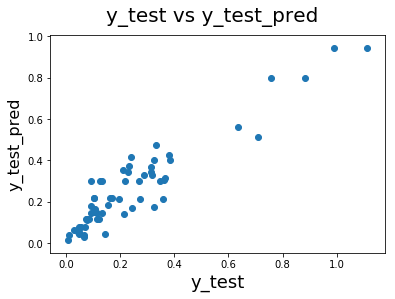

In [369]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [370]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8643334397833886

## Summary

##### Note
 - R2 on Train model ~84% and that on test set is ~ 86% 
 - distribution of y_test_pred vs y_test also looks that error terms have constant variance 
 
 #### Hence we can conclude that lr9 was best model and that explains the linear relationship in best way on the given data

So, after this analysis and fitting a linear model on the given data, we could conclude that following columns are having linear relationship with Price:
1. Engine Size
2. Car Width
3. Engine Location
4. Drive Wheel